# Project: TMDb Movie Data
---
## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#wrangle)
 - [General Properties](#general)
 - [Cleaning Data](#cleaning)
-  [Exploratory Data Analysis](#exploring)
 - [Preparing Data Analysis](#prep)
 - [Research Questions](#questions)
- [Conclusion](#concl)

<a name='intro'></a>
## Introduction

> In this project, I will explore `TMDb movie dataset` which contains information about 10,000 movies, go through the data analysis process,<br> and see how everything fits together.

> ### Note:
 - Certain columns, like `'cast'` and `‘genres’`, contain multiple values separated by pipe `(|)` characters.
 - There are some odd characters in the `‘cast’` column.
 - The final two columns ending with `“_adj”` show the budget and revenue of the associated movie in terms of 2010 dollars, <br>
accounting for inflation over
time.

> ### Questions to be answered:
> 1. Movie(s) that made most and least profit? 
> 2. How many movies were able to break-even from year to year?
> 3. Which genres are most popular from year to year? 
> 4. Movie market growth trend (total and average budget and revenue)
> 5. Does higher budget guarantee higher revenue? 
> 6. Is website becoming an essential element of movie marketing?


In [250]:
# import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set style
sns.set_style('darkgrid')

<a name='wrangle'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

<a name='general'></a>
### General Properties

In [2]:
# load data and check first five rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Number of rows and columns
df.shape

(10866, 21)

In [4]:
# Check datatypes
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# number of unique values per each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
# number of rows with missing values per each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Number of duplicates
df.duplicated().sum()

1

<a name='cleaning'></a>

### Cleaning Data
> - Drop unnecessary columns for our investigation
- Drop rows with zero values 
- Drop nulls
- Dedupe

> First, let's drop unneccessary columns before executing `dropna()` and `drop_duplicates()` to avoid losing rows that might contain meaningful data in them 

In [8]:
# Define columns to drop
drop_cols = ['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'budget_adj', 'revenue_adj']

df.drop(drop_cols, axis=1, inplace=True)

In [9]:
# Check the shape
df.shape

(10866, 11)

> Next, let's drop rows that contain zeroes since there is no indication whether these zeroes are actually zeroes or just missing.

In [10]:
# Take a look how many rows contain zeroes 
df[(df == 0).any(1)].count()

popularity              7011
budget                  7011
revenue                 7011
original_title          7011
director                6968
runtime                 7011
genres                  6988
production_companies    6027
vote_count              7011
vote_average            7011
release_year            7011
dtype: int64

In [11]:
# Keep rows with non-zero values everywhere 
df = df[(df != 0).all(1)]

## or dropping rows with any zero values
# drop_zeroes = df[(df == 0).any(1)].index
# df.drop(drop_zeroes, inplace=True)

# Check shape
df.shape

(3855, 11)

> Now, we are going to finish our cleaning by removing nulls and duplicates.

In [12]:
# Check null
df.isnull().sum()

popularity               0
budget                   0
revenue                  0
original_title           0
director                 1
runtime                  0
genres                   0
production_companies    46
vote_count               0
vote_average             0
release_year             0
dtype: int64

In [13]:
# drop nulls 
df.dropna(inplace=True)

# check shape
df.shape

(3808, 11)

In [14]:
# check duplicates
df.duplicated().sum()

1

In [15]:
# we have one duplicate, let's take a look
df[df.duplicated()]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
2090,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010


In [16]:
# dedupe and check shape
df.drop_duplicates(inplace=True)

df.shape

(3807, 11)

In [17]:
# save 
df.to_csv('tmdb-movies-clean.csv', index=False)

> Finally, throughout cleaning processes, we now have our dataframe with ***3807 rows*** with ***11 columns*** ready to be analyzed.

<a name='exploring'></a>

## Exploratory Data Analysis
> In this section, we are going to compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.<br>
We will start with looking at one variable at a time, and then follow it up by looking at relationships between variables.

<a name='prep'></a>

### Preparing Data Analysis
> - Manipulate dataframe
- Define functions that will be used to answer proposed questions
- Prepare subsets of data for each questions

In [18]:
# load data and check
df = pd.read_csv('tmdb-movies-clean.csv')
df.head(3)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015


> To start with, let's manipulate our dataframe before answering some specific questions.<br>
- rearrange our column orders for easier slicing relative to our proposed questions
- add `'profit'` column defined as $profit = revenue - budget$ <br>
- add `'break_even'` column with `'yes'` or `'no'` where `break-even point` is defined as $ break \ even = 2 \times budget$

In [38]:
# rearrange the column order so that columns that will be used for each questions are closer to each other
new_order = ['original_title', 'genres', 'director', 'production_companies', 'release_year', 
             'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'popularity']

df = df[new_order]
df.head(0)

,original_title,genres,director,production_companies,release_year,budget,revenue,runtime,vote_count,vote_average,popularity


In [39]:
# add 'profit' column after revenue column
df.insert(7,'profit', df['revenue']-df['budget'])

In [40]:
# add 'break_even' column. 'yes' if 'revenue' is greater or equal to twice the budget, else 'no'
df.insert(8,'break_even', np.where(df['revenue']>=df['budget']*2,'yes','no'))

In [41]:
# check the modified dataframe
df.head(3)

,original_title,genres,director,production_companies,release_year,budget,revenue,profit,break_even,runtime,vote_count,vote_average,popularity
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,2015,150000000,1513528810,1363528810,yes,124,5562,6.5,32.985763
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,150000000,378436354,228436354,yes,120,6185,7.1,28.419936
2,Insurgent,Adventure|Science Fiction|Thriller,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,2015,110000000,295238201,185238201,yes,119,2480,6.3,13.112507


> Next, write a function that returns an informational dataframe based on maximum and minimum *(first occurrence if many)* of a requested column <br>
and presents it in a more readable tableform. 

In [42]:
# define a function which takes a column name and a dataframe(df by default)
def mum_table(col, df =df):
    # find index of maximum and minimum of a requested axis    
    id_extrema = [df[col].idxmax(), df[col].idxmin()] 
    
    # select the data
    df_temp = df.loc[id_extrema,:]
    
    # set 'original_title' as new index, delete the index title, and transpose
    df_temp = df_temp.set_index('original_title').rename_axis(None).T
    
    return df_temp

> What if I want to see top & bottom 3 or 5 movies regarding their numerical values ?

In [145]:
# define a function named find_extrema()
def n_extrema(col, i=1):
    df_top = df.sort_values(by= col, ascending=False).head(i).reset_index(drop=True)
    
    # ascending True ...
    df_bot = df.sort_values(by= col, ascending=True).head(i).reset_index(drop=True)
    return df_top, df_bot

> Since we have few columns that contain multiple values separated with pipe (|) characters, <br>
let's define another function that will help us spliting these values and counting them.

> 

In [146]:
# define a function named word_count()
def word_count(col, df =df):
    # concatenate every row first, then split 
    my_lst = df[col].str.cat(sep='|').split('|')
    my_series = pd.Series(my_lst)
    return my_series.value_counts()

---
<a name='questions'></a>
### Research Questions
#### Q1. Movies that made most and least profit

In [142]:
# 
mum_table('profit', df).iloc[4:8]

,Avatar,The Warrior's Way
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
break_even,yes,no


In [147]:
#
top_profit, bot_profit = n_extrema('profit', 3)
top_profit

,original_title,genres,director,production_companies,release_year,budget,revenue,profit,break_even,runtime,vote_count,vote_average,popularity
0,Avatar,Action|Adventure|Fantasy|Science Fiction,James Cameron,Ingenious Film Partners|Twentieth Century Fox ...,2009,237000000,2781505847,2544505847,yes,162,8458,7.1,9.432768
1,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,2015,200000000,2068178225,1868178225,yes,136,5292,7.5,11.173104
2,Titanic,Drama|Romance|Thriller,James Cameron,Paramount Pictures|Twentieth Century Fox Film ...,1997,200000000,1845034188,1645034188,yes,194,4654,7.3,4.355219


In [148]:
bot_profit

,original_title,genres,director,production_companies,release_year,budget,revenue,profit,break_even,runtime,vote_count,vote_average,popularity
0,The Warrior's Way,Adventure|Fantasy|Action|Western|Thriller,Sngmoo Lee,Boram Entertainment Inc.,2010,425000000,11087569,-413912431,no,100,74,6.4,0.25054
1,The Lone Ranger,Action|Adventure|Western,Gore Verbinski,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013,255000000,89289910,-165710090,no,149,1607,6.0,1.21451
2,The Alamo,Western|History|War,John Lee Hancock,Imagine Entertainment|Touchstone Pictures,2004,145000000,25819961,-119180039,no,137,60,5.9,0.94856


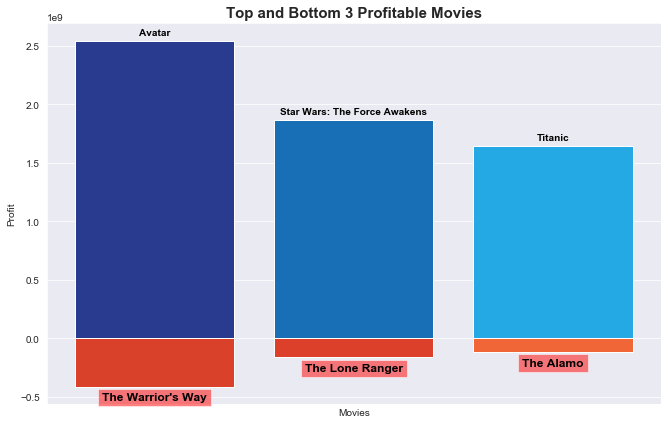

In [205]:
# Bar plot
plt.figure(figsize=(11,7))
location = [i+1 for i in top_profit.index]
#height = df_temp.loc['profit'].tolist()
height = top_profit['profit'].tolist()
height2 = bot_profit['profit'].tolist()

#plt.bar(location, height, tick_label= labels, color ='blue', alpha = 0.7)
plt.bar(location, height, color =['#293B8E', '#196FB6', '#25A9E5'])
plt.bar(location, height2, color=['#DA412A','#DC402A', '#F16637'])
plt.xticks([]) # remove xticks
plt.title('Top and Bottom 3 Profitable Movies', fontweight='bold', fontsize=15)
plt.xlabel('Movies')
plt.ylabel('Profit');

#plt.ylim(-7,6)
for i, v in enumerate(height):
    plt.text(i+1, v+0.5E8, top_profit['original_title'][i], color='black', fontweight='bold', ha='center')

for i, v in enumerate(height2):
    plt.text(i+1, v-1.2E8, bot_profit['original_title'][i], color='black', fontweight='bold', ha='center', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))



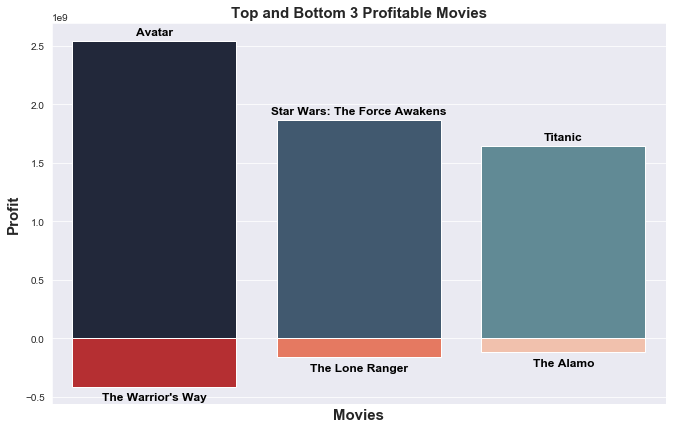

In [335]:
plt.figure(figsize=(11,7))
location = [i+1 for i in top_profit.index]
#height = df_temp.loc['profit'].tolist()
height = top_profit['profit'].tolist()
height2 = bot_profit['profit'].tolist()

#plt.bar(location, height, tick_label= labels, color ='blue', alpha = 0.7)
sns.barplot(location, height, palette=sns.cubehelix_palette(3, start=3, rot=-.3, light=0.5, reverse=True))
sns.barplot(location, height2, palette='Reds_r')
plt.xticks([]) # remove xticks
plt.title('Top and Bottom 3 Profitable Movies', fontweight='bold', fontsize=15)
plt.xlabel('Movies', fontweight='bold', fontsize=15)
plt.ylabel('Profit', fontweight='bold', fontsize=15);

#plt.ylim(-7,6)
for i, v in enumerate(height):
    plt.text(i, v+0.5E8, top_profit['original_title'][i], color='black', fontweight='bold', ha='center', fontsize=12)

for i, v in enumerate(height2):
    plt.text(i, v-1.2E8, bot_profit['original_title'][i], color='black', fontweight='bold', ha='center', fontsize=12)



In [18]:
cols = ['release_year','budget','revenue']
df_temp = df[cols]
df_temp = df_temp.groupby('release_year').mean()
df_temp.head()

,budget,revenue
release_year,,
1960,4.161390e+06,2.580100e+07
1961,3.863700e+06,3.377202e+07
1962,5.635714e+06,2.947569e+07
1963,1.018583e+07,2.942115e+07
1964,4.847880e+06,4.694479e+07


In [ ]:
# labeling function
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

In [110]:
# runtime ?
find_extrema('runtime')

,Carlos,Kid's Story
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C
vote_count,35,16
vote_average,6.2,6.8


#### Q2. Movies that have longest and shortest runtime

In [67]:
df.runtime.min()

15

In [7]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


In [368]:
df_mean = df.groupby('release_year').mean()[['budget','revenue']]

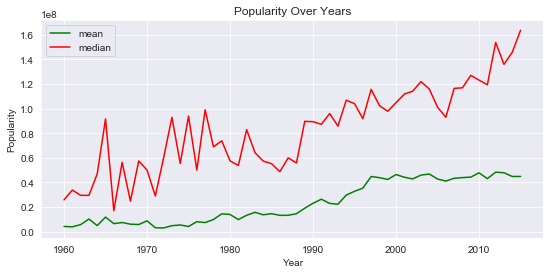

In [372]:
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1, y2 = df_mean.index, df_mean.budget, df_mean.revenue

#set size
plt.figure(figsize=(9, 4))
#plot line chart for mean and median
plt.plot(x1, y1, color = 'g', label = 'mean')
plt.plot(x1, y2, color = 'r', label = 'median')
#set title and labels
plt.title('Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity');
#set legend
plt.legend(loc='upper left');

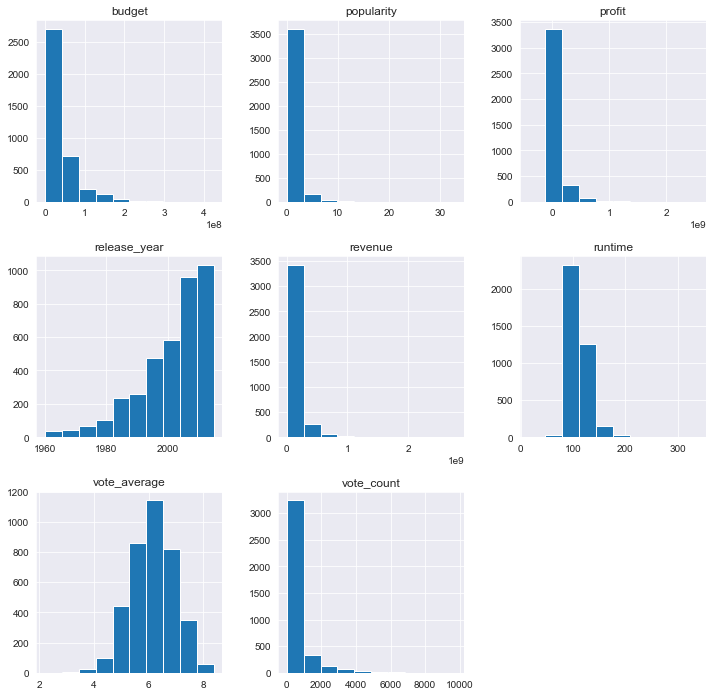

In [27]:
df.hist(figsize=(12, 12));

In [38]:
df.popularity.describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

In [45]:
df.cast[10]

'Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralph Fiennes|Monica Bellucci'

In [114]:
df.count()

popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
runtime                 10866
genres                  10843
production_companies     9836
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

In [126]:
pd.Series(df.genres[:3].str.cat(sep='|').split('|')).value_counts()

Adventure          3
Thriller           3
Science Fiction    3
Action             2
dtype: int64

In [53]:
np.divide(np.array(df.budget),np.array(df.revenue)) 

array([0.09910614, 0.39636784, 0.37258051, ..., 0.7755    , 0.6       ,
       0.42625   ])

In [25]:
df.budget/df.revenue

0       0.099106
1       0.396368
2       0.372581
3       0.096703
4       0.126141
5       0.253307
6       0.351790
7       0.181397
8       0.063973
9       0.204988
10      0.278196
11      0.956586
12      0.406841
13      0.361193
14      0.199283
15      0.282486
16      0.147343
17      0.250674
18      0.175163
19      0.245956
20      0.908936
21      0.327119
22      0.233798
23      0.070218
24      0.209979
25      0.219835
26      0.315014
27      0.200593
28      0.226381
29      0.195980
          ...   
3775    0.050241
3776    0.125311
3777    0.186978
3778    1.666667
3779    0.085392
3780    0.058646
3781    0.080384
3782    9.777147
3783    0.033001
3784    0.106449
3785    0.011818
3786    0.183200
3787    0.004286
3788    0.019149
3789    0.300000
3790    0.065714
3791    0.131271
3792    0.543953
3793    1.000000
3794    0.691563
3795    0.527123
3796    0.145551
3797    1.140194
3798    0.256426
3799    0.269268
3800    0.222310
3801    0.230769
3802    0.7755

In [57]:
df[df.director.str.contains('J.J.')]

,original_title,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
3,Star Wars: The Force Awakens,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
349,Star Trek,3.829570,150000000,385680446,Chris Pine|Zachary Quinto|Leonard Nimoy|Eric B...,J.J. Abrams,127,Science Fiction|Action|Adventure,Paramount Pictures|Spyglass Entertainment|Bad ...,3417,7.3,2009
1114,Super 8,2.026717,50000000,260095987,Joel Courtney|Elle Fanning|Riley Griffiths|Kyl...,J.J. Abrams,112,Thriller|Science Fiction|Mystery,Paramount Pictures|Amblin Entertainment|Bad Ro...,1527,6.6,2011
1849,Star Trek Into Darkness,3.877342,190000000,467365246,Chris Pine|Zachary Quinto|Zoe Saldana|Karl Urb...,J.J. Abrams,132,Action|Adventure|Science Fiction,Paramount Pictures|Skydance Productions|Bad Ro...,3363,7.4,2013
2222,Mission: Impossible III,3.098051,150000000,397850012,Tom Cruise|Philip Seymour Hoffman|Ving Rhames|...,J.J. Abrams,126,Adventure|Action|Thriller,Paramount Pictures|Cruise/Wagner Productions|S...,1363,6.3,2006


True

> ## Conclusion

> ### Limitation
- Doens't reflect the whole movie market since it's only 10k movies

<a name='foot'></a>
> ### References to keep:
 - movie break-even https://movies.stackexchange.com/questions/81776/why-is-the-break-even-point-for-movies-usually-twice-the-budget
 - create column using conditional: https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/
 - dropping 0: https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741